In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib notebook

import os
import sys

# Content Summary
Summary stats about keystrokes. 

In [13]:
logs = pd.read_csv(os.path.join('', 'keylogger_20171005.testlog'), names=['timestamp', 'type', 'key'], header=None,
                  parse_dates=['timestamp'], index_col='timestamp', comment='#')
print("Total of {} events".format(len(logs)))
logs.head()

Total of 446 events


,type,key
timestamp,,
2017-10-05 14:31:07,KB,Lshift
2017-10-05 14:31:07,KB,T
2017-10-05 14:31:07,KB,H
2017-10-05 14:31:07,KB,I
2017-10-05 14:31:07,KB,S


<IPython.core.display.Javascript object>


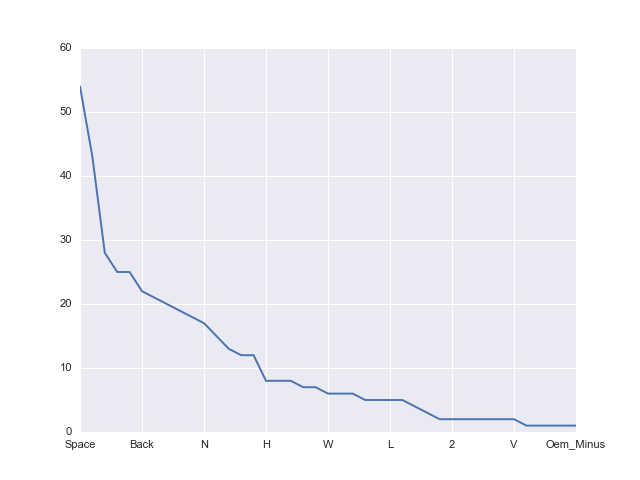

In [14]:
# count by event
logs['key'].value_counts().plot()
plt.show()

In [47]:
# longest continuous same-event sequence
def top_contiguous_sequences(logs, N):
    # check where element is different from previous
    splits = np.where(logs['key'].shift()!=logs['key'])[0]
    # compute length of equal contiguous sequences
    seq_len = splits[1:]-splits[0:-1]
    # take top N indexes
    top_split_idxs = np.argsort(seq_len)+1
    top_n_idxs = top_split_idxs[-N:]
    # zip key value, length and index
    return list(zip(logs['key'].values[splits[top_n_idxs-1]], splits[top_n_idxs-1], seq_len[top_n_idxs-1]))[::-1]

In [48]:
top_contiguous_sequences(logs, 5)

[('Lshift', 128, 26),
 ('Space', 104, 6),
 ('Back', 354, 6),
 ('Back', 345, 4),
 ('Back', 288, 4)]

In [49]:
# top occurring bigrams
# different: specifies if bigram need to have different entries
def top_occurring_bigrams(logs, N, different=True):
    bigrams = list(zip(logs['key'].values[:-1], logs['key'].values[1:]))
    if different:
        bigrams = filter(lambda x : x[0]!=x[1], bigrams)
    count = Counter(bigrams)
    return count.most_common(N)

In [50]:
top_occurring_bigrams(logs, 5)

[(('O', 'D'), 8),
 (('S', 'Space'), 8),
 (('Space', 'T'), 7),
 (('Space', 'Lshift'), 6),
 (('E', 'T'), 5)]

# Timing Summary
Timing related stats, like keystrokes per minute. Delays, pauses, and further aggregation.

In [51]:
# character/key count per minute
def cmp(logs):
    count = logs['key'].resample('1T').count()
    res = {
        'min_cpm':count.min(),
        'max_cpm':count.max(),
        'avg_cpm':count.mean(),
        'std_cpm':count.std()
    }
    return res

In [52]:
cmp(logs)

{'avg_cpm': 111.5,
 'max_cpm': 230,
 'min_cpm': 50,
 'std_cpm': 81.997967454484296}

<IPython.core.display.Javascript object>


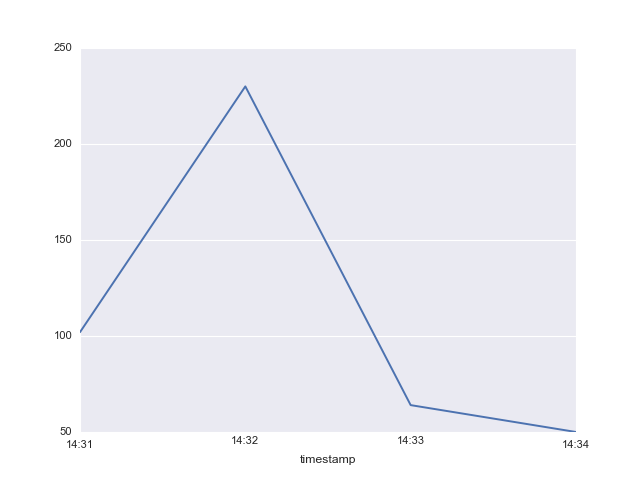

In [53]:
logs['key'].resample('1T').count().plot()
plt.show()